# Deep Learning - Supervised Classification

## Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Load data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Plot data

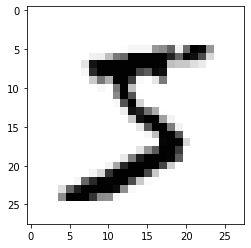

In [6]:
plt.imshow(x_train[0], cmap='Greys');

## Create a NN

* Softmax (activation of the output layer): gives the probability of belonging to each class
* Relu (activation): the function returns 0 if it receives any negative input, but for any positive value x it returns that value back: $f(x) = max(0,x)$
* Loss for classification: sparse_categorical_crossentropy
* Batch_size: informs the fit model how often to recompute the weights
* Dropout layer is for regularization
* Overfitted: training accuracy is nearly 100%, but testing accuracy is not

In [7]:
# 2.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
# 4.
h = model.fit(x_train, y_train, epochs=10, batch_size=256)
# 5.
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('Test accuracy: {}'.format(eval_acc))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3114 - acc: 0.9119
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1309 - acc: 0.9620
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample

### Plot results

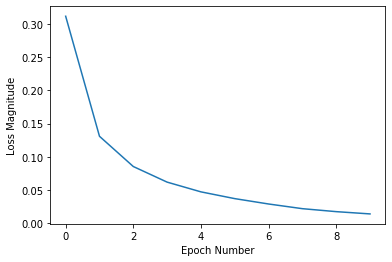

In [8]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(h.history['loss'])

### Predict

In [10]:
img = x_test[0]
img = np.array([img])
prediction = model.predict(img)
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print(prediction * 100)

[[ 0.00  0.00  0.00  0.10  0.00  0.00  0.00  99.90  0.00  0.00]]


In [12]:
np.argmax(prediction[0]), y_test[0]

(7, 7)

## Convert to binary problem

In [3]:
img_rows, img_cols = 28, 28

if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
if tf.keras.backend.image_data_format() == 'channels_last':
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
y_train = np.where(y_train != 5, 0, 1)
# not digit 5, then y target convert to 0
# if it is digit 5, then y target is 1
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

In [ ]:
# 2.
num_classes = 1
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])
model.summary()
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
# 3.
x_val = x_train[50000:]
x_train_1 = x_train[:50000]
y_val = y_train[50000:]
y_train_1 = y_train[:50000]
# 4.
epochs = 20
batch_size = 128
h = model.fit(x_train_1,y_train_1,epochs=epochs,batch_size=batch_size,validation_data=(x_val, y_val))

### Plot results

In [11]:
loss_values = h.history['loss']
val_loss_values = h.history['val_loss']
epochs = range(1, len(h.history['loss']) + 1)

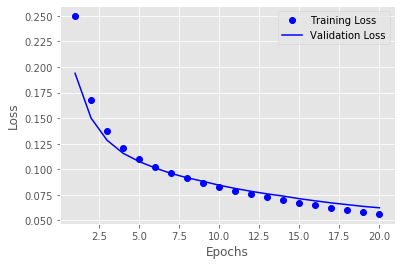

In [12]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo', 
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## IMDB Exercise (NLP)

### Load data

In [4]:
imdb = tf.keras.datasets.imdb
max_features = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train.shape

17465344/17464789 [==============================] - 2s 0us/step


(25000,)

x_train is a column of sentences. Each sentence is a list of integers that represent a specific word

y_train is a column of reviews. 0 stands for a negative review, 1 for a positive review

In [ ]:
word_index = imdb.get_word_index()
# reverse them
[(value,key) for (key,value) in word_index.items()]

Convert the x_train array from a features of text (integers) to a matrix of 0 and 1. 

0 - when no such word exist. 

1 - when the word exist in the slice of data.

In [7]:
def matrix_seq(data, dim=max_features):
    results = np.zeros((len(data), dim))    # create a matrix of zeros for writing
                                            # with size 25000,5000
    for i, loc in enumerate(data):
        results[i, loc] = 1.                # Put a 1.0 when the word exist
    return results

In [8]:
x_train = matrix_seq(x_train)
x_test = matrix_seq(x_test)

In [10]:
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

### Create NN

In [14]:
# 2.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(5000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
# 3.
x_val = x_train[:10000]
x_train_1 = x_train[10000:]
y_val = y_train[:10000]
y_train_1 = y_train[10000:]
# 4.
h = model.fit(x_train_1,
              y_train_1,
              epochs=50,
              batch_size=512,
              validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80016     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 80,033
Trainable params: 80,033
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6956 - acc: 0.4987 - val_loss: 0.6921 - val_acc: 0.5185
Epoch 2/50
15000/15000 [==============================] - 1s 37us/sample - loss: 0.6888 - acc: 0.5364 - val_loss: 0.6863 - val_acc: 0.5526
Epoch 3/50
15000/15000 [==============================] - 1s 37us/sample - loss: 0.6823 - acc: 0.5732 - val_loss: 0.6799 - val_acc: 0.5867
Epoch 4/50
15000/15000 [=====================

### Plot results

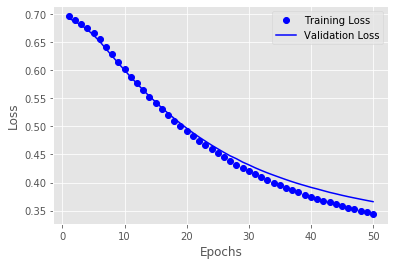

In [15]:
loss_values = h.history['loss']
val_loss_values = h.history['val_loss']
epochs = range(1, len(h.history['loss']) + 1)
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo', 
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();